<a href="https://colab.research.google.com/github/Pin9u/pythonpractice/blob/master/cnn_classification_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np

In [8]:
def build_model(width, height, channel):
    model = Sequential()
    
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(width, height, channel)
    ))
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(AveragePooling2D(
        pool_size=(8,8),
        padding='same'
    ))

    model.add(Flatten())
    model.add(Dense(
        units=640,
        activation='relu'
    ))
    model.add(Dense(
        units=10,
        activation='softmax'
    ))

    opt = Adam(learning_rate=0.001)
    model.compile(
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

    return model


In [9]:
def data_preprocessing():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    mean=[0,0,0]
    std=[0,0,0]
    newX_train = np.ones(X_train.shape)
    newX_test = np.ones(X_test.shape)
    #train set에 있는 데이터로만 평균과 표준편차를 구함
    for i in range(3):
        mean[i] = np.mean(X_train[:,:,:,i])
        std[i] = np.std(X_train[:,:,:,i])

    #train과 test셋 모두 정규화 작업    
    for i in range(3):
        newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
        newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
        newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
        newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
            
    X_train = newX_train
    X_test = newX_test

    return (X_train, Y_train), (X_test, Y_test)


In [10]:
#(X_train, Y_train), (X_test, Y_test) = data_preprocessing()
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


model = build_model(X_train.shape[1],X_train.shape[2],X_train.shape[3] )

hist = model.fit(
    X_train, Y_train, 
    batch_size=64, epochs=100, 
    verbose=1, 
    shuffle=True, validation_split=0.01
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/100
774/774 [==============================] - 6s 7ms/step - loss: 1.5934 - accuracy: 0.4120 - val_loss: 1.3208 - val_accuracy: 0.5380
Epoch 2/100
774/774 [==============================] - 5s 7ms/step - loss: 1.2049 - accuracy: 0.5676 - val_loss: 1.1277 - val_accuracy: 0.6020
Epoch 3/100
774/774 [==============================] - 5s 7ms/step - loss: 1.0459 - accuracy: 0.6282 - val_loss: 0.9957 - val_accuracy: 0.6500
Epoch 4/100
774/774 [==============================] - 5s 7ms/step - loss: 0.9368 - accuracy: 0.6691 - val_loss: 0.9556 - val_accuracy: 0.6540
Epoch 5/100
774/774 [==============================] - 5s 7ms/step - loss: 0.8612 - accuracy: 0.6974 - val_loss: 0.8506 - val_accuracy: 0.6860
Epoch 6/100
774/774 [==============================] - 5s 7ms/step - loss: 0.8086 - accuracy: 0.7171 - val_loss: 0.8314 - val_accuracy: 0.7080
Epoch 7/100
774/774 [==============================] - 5s 7ms/step - loss: 0.7577 - accuracy: 0.7325 - val_loss: 0.7594 - val_accuracy: 0.7420

[2.2717108726501465, 0.725600004196167]

In [11]:
import matplotlib.pyplot as plt

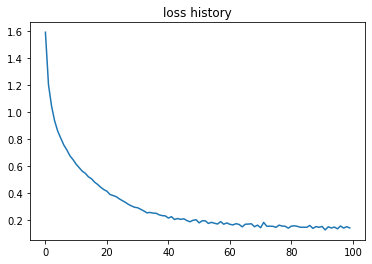

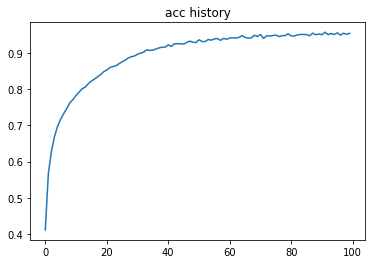

In [12]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()